In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest
#sys.path.append('C:\\Users\\brittany\\henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f
#sys.path.append('C:\\Users\\Lindsey\\Documents\\GitHub\\WhenMutationsDontMatter\\')
#import plot_utils as p


import cptac
import cptac.utils as u

In [3]:
df = pd.read_csv('pancan_EGFR.csv')
df = df.drop(['Unnamed: 0'], axis=1)
filtered_data = df[df["Comparison"]== "ARG1"]
filtered_data

,Comparison,Slope_Gbm,R_squared_gbm,P_value_Gbm,Slope_kidney,R_squared_kidney,P_value_kidney,Slope_Endo,R_squared_Endo,P_value_Endo,...,P_value_Ovar,Slope_Brca,R_squared_Brca,P_value_Brca,Slope_Luad,R_squared_Luad,P_value_Luad,Slope_hnscc,R_squared_hnscc,P_value_hnscc
1740,ARG1,-0.006077,0.000103,0.91659,0.754793,0.295593,4.426750e-15,-0.125737,0.007966,0.287412,...,0.000002,0.367109,0.080817,0.002076,-0.388205,0.062622,0.000225,-3.567485,0.004205,0.375357


In [4]:
df_slope = df.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]]
df_slope = df_slope.dropna(thresh = 6)
df_slope

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc
0,GRB2,-0.163726,0.195011,-0.259424,-0.028630,-0.103359,-0.131561,-0.045965
1,SOX9,0.248300,0.198859,0.146958,0.127774,0.281249,NaN,NaN
2,CDKN2C,0.275173,0.506703,0.044002,0.748923,0.176449,-0.210660,NaN
3,GAB1,0.142447,-0.175248,0.013304,0.485464,-0.077163,-0.126900,-0.003759
4,DBI,0.181830,-0.648547,-0.252010,0.119505,0.159756,-0.169133,-0.170365
...,...,...,...,...,...,...,...,...
1920,ABCC5,NaN,0.166732,NaN,0.943127,-0.038190,0.137913,-0.008605
1930,LAMC2,NaN,-0.055545,-0.166708,0.697587,0.573073,-0.204184,0.261169
1936,TFAP2A,NaN,0.036683,-0.184093,0.063536,0.049544,NaN,0.009638
1941,GPX2,NaN,0.020950,-0.173672,-0.494593,NaN,-0.887700,0.062529


In [5]:
df_slope["SD"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].std(axis = 1))


In [6]:
df_slope.nlargest(10, 'SD')

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,SD
1142,MYL1,-0.070427,-0.296202,NaN,0.344465,NaN,-0.180677,-8.715718,3.882641
657,ACVR1,-0.044394,-0.120272,0.385674,0.069127,0.276709,0.199224,-8.825737,3.388709
1280,VIM,0.070424,0.946759,0.332321,0.595027,0.287442,-0.132727,-7.306996,2.915014
1831,ITGB6,NaN,-0.819923,0.577964,0.438791,0.542116,-0.050240,-5.776941,2.471975
72,MET,-0.157167,0.927873,0.212156,0.167618,0.736808,0.587682,-4.582195,1.923936
1349,SERPINA1,-0.049350,0.209853,0.221388,1.330491,0.158214,-0.330752,-4.205985,1.764226
611,GFAP,0.139648,NaN,0.246446,0.699214,0.439710,NaN,-3.218248,1.623746
1475,CCL20,-0.046228,0.553596,-0.148086,3.629718,NaN,-0.106711,NaN,1.620366
1740,ARG1,-0.006077,0.754793,-0.125737,0.963529,0.367109,-0.388205,-3.567485,1.525000
1487,ITGAX,-0.019922,1.448414,0.172074,-0.210494,0.150228,-0.074419,-2.506430,1.178123


In [9]:
df_slope["mean"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].mean(axis = 1))
df_slope["median"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].median(axis = 1))
#df_slope["median"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].range(axis = 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a860cc0>]],
      dtype=object)

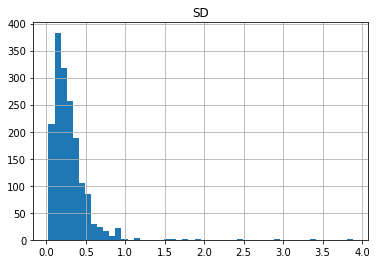

In [7]:
df_slope.hist(column='SD', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a88e0b8>]],
      dtype=object)

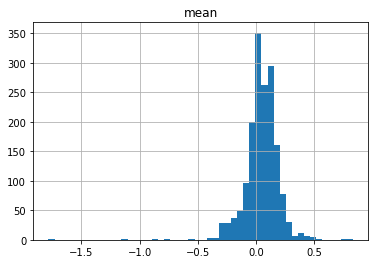

In [8]:
df_slope.hist(column='mean', bins = 50)

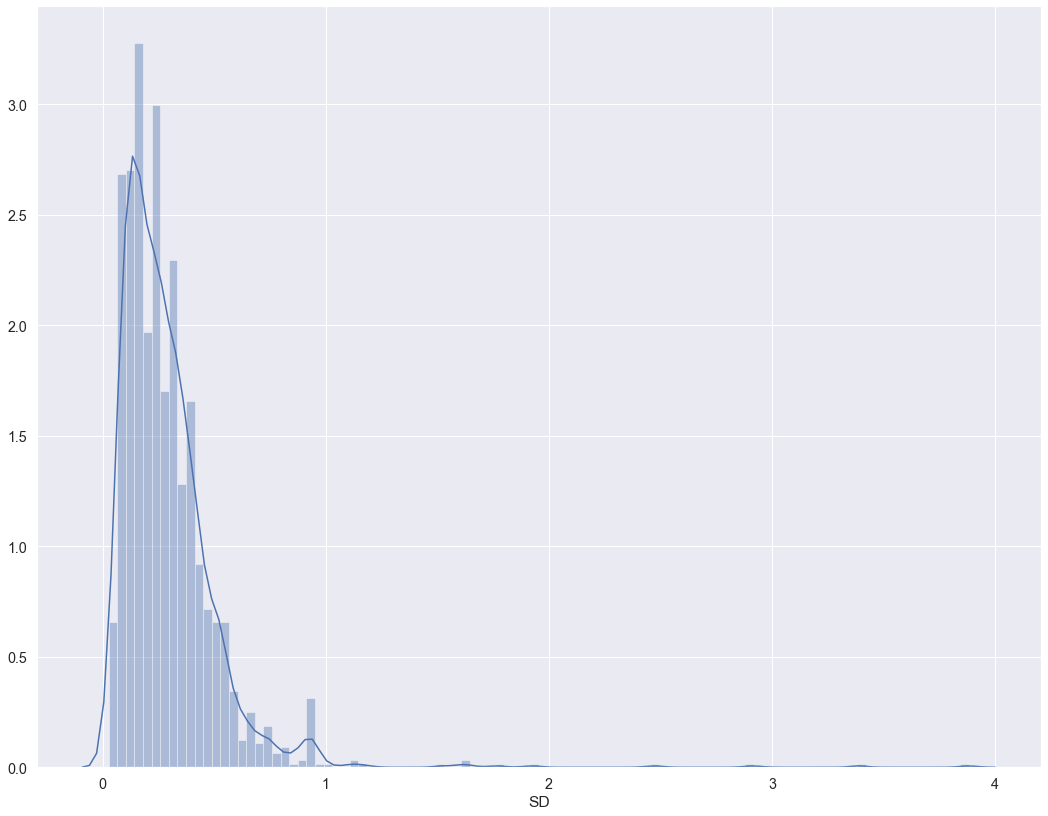

In [14]:
plt.rcParams["figure.figsize"] = (18,14)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["SD"], bins = 100)

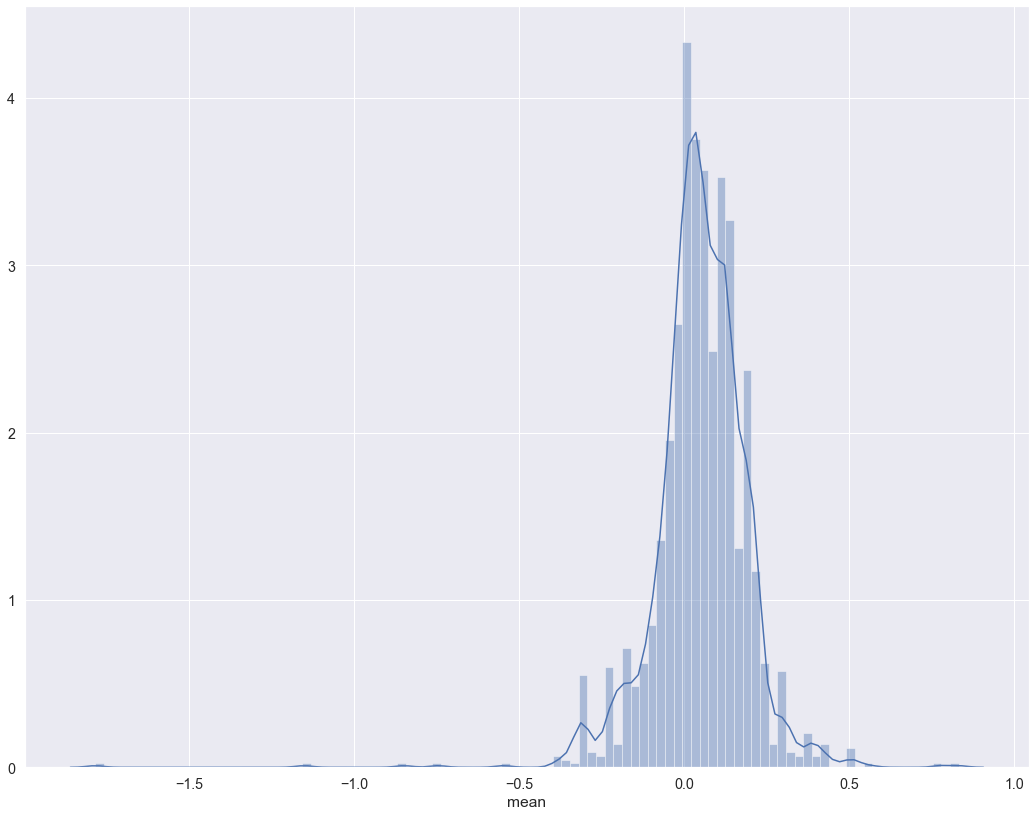

In [16]:
plt.rcParams["figure.figsize"] = (18,14)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["mean"], bins = 100)